# Part 1: Regression analysis of Gapminder data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols

# importing and reading dataset
data = pd.read_csv('mirror/08_gap-every-five-years.tsv', sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1

### Make a scatter plot of life expectancy across time.

Text(0.5, 1.0, 'Life Expectancy Across Time')

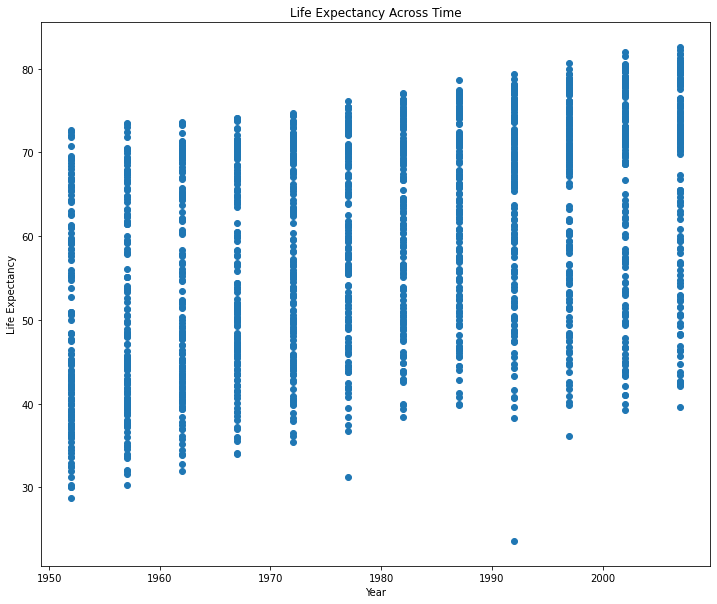

In [18]:
plt.figure(figsize = (12, 10))
years = data.loc[:, "year"]
life_exp = data.loc[:, "lifeExp"]
plt.scatter(years, life_exp)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Across Time")

### Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

Yes, there is a general trend for life expectancy across time, and this scatter plot shows that it is an increasing trend. Its linear in nature as well, because in the early years of the data, life expectancy is more concentrated at the lower half of the graph, yet as time goes on, life expectancy becomes more concentrated within the upper half of the graph.

Text(0.5, 1.0, 'Life Expectancy Across Time')

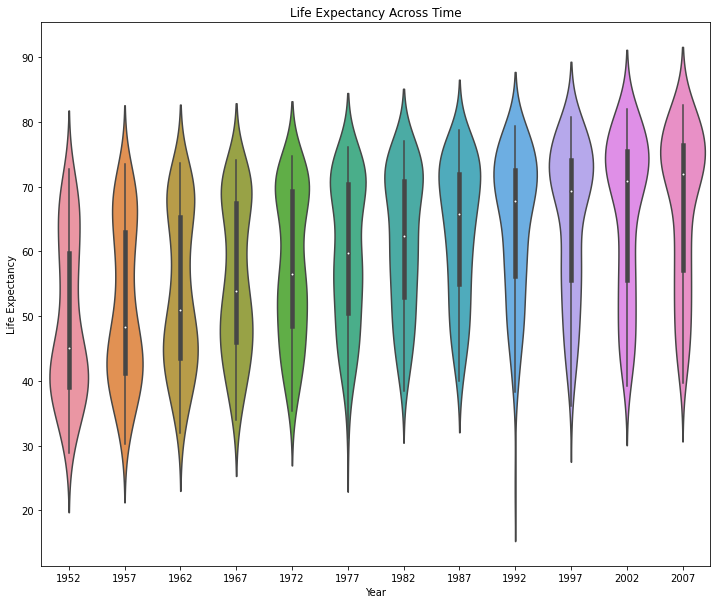

In [19]:
plt.figure(figsize = (12, 10))
sns.violinplot(x = "year", y = "lifeExp", data = data)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Across Time")

### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it's center?

The distribution of life expectancy across countries for individual years is in fact skewed, due to the fact that the data for certain years have clear tails, such as 1992 for example. This distribution is not unimodal either because for some years, there are more than one mode, and this distribution is not symmetric around it's center because it is not a normal distribution.

### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

Yes, I would reject the null hypothesis of no relationship, because the violin plot demonstrates that there is a positive relationship between life expectancy and year, which signifies that we in fact, should reject the null hypothesis.

### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like?

This violin plot would appear linear as well.

### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like?

The violin plot should look like a normal distribution. That means is should be symmetric and it should center around 0.

## Exercise 2

### Fit a linear regression model for life expectancy vs. year (as a continuous variable).

In [20]:
# reshaping arrays for both year and lifeExp
x = np.array(years).reshape(-1, 1)
y = np.array(life_exp).reshape(-1, 1)

model = LinearRegression()
fitted_model = model.fit(x, y)

### Question 6: On average, by how much does life expectancy increase every year around the world?

On average, life expectancy incrases by about 0.326 years every year around the world.

In [21]:
coef = fitted_model.coef_[0][0]
print(coef)

0.3259038276371518


### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

In [22]:
lin_reg = ols(formula = "lifeExp ~ year", data = data).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        17:40:25   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

Yes, I do reject the null hypothesis in this case because the p-value is 0, as demonstrated by the OLS regression summary above, under the "P>|t|" column. This means that the probability that the null hypothesis is true is equal to 0, so there is statistically no reason to accept it.

## Exercise 3

### Make a violin plot of residuals vs. year for the linear model from Exercise 2.

In [23]:
intercept = fitted_model.intercept_[0]
expected_arr = []

# calculating expected values using regression equation
for i, row in data.iterrows():
    expected = coef * (row['year']) + intercept
    expected_arr.append(expected)

# calculating residuals
data['expected_lifeExp'] = expected_arr
data['residuals'] = data['lifeExp'] - data['expected_lifeExp']

data['year'] = data['year'].astype(int)
data['pop'] = data['pop'].astype(int)

Text(0.5, 1.0, 'Life Expectancy Residuals Across Time')

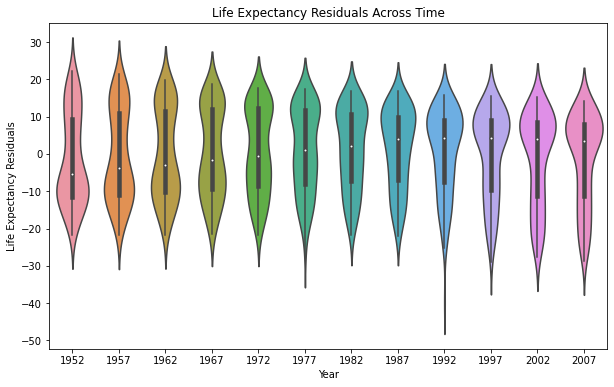

In [24]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'year', y = 'residuals', data = data)

plt.xlabel("Year")
plt.ylabel("Life Expectancy Residuals")
plt.title("Life Expectancy Residuals Across Time")

### Question 8: Does the plot of Exercise 3 match your expectations?

Yes, this plot does match my expectations, becasue the plot is not normally distributed, skewed, multimodal, and it centers around 0.

## Exercise 4

### Make a boxplot (or violin plot) of model residuals vs. continent

Text(0.5, 1.0, 'Life Expectancy Residuals in Each Continent')

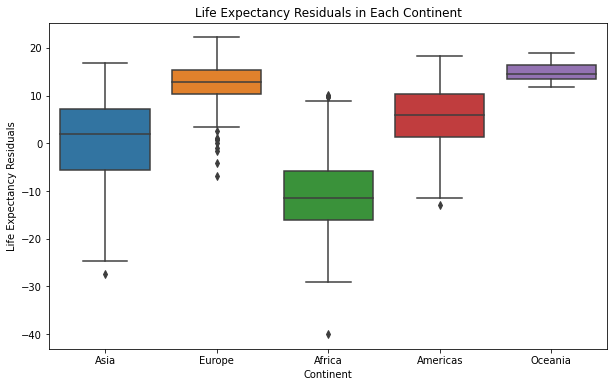

In [25]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'continent', y = 'residuals', data = data)

plt.xlabel("Continent")
plt.ylabel("Life Expectancy Residuals")
plt.title("Life Expectancy Residuals in Each Continent")

### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, there is a dependence between model residual and continent, and this is represented by the fact that each box is different for each continent. This suggests that the continent has some degree of effect on the life expectancy across time by varying amounts.

## Exercise 5

### Make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

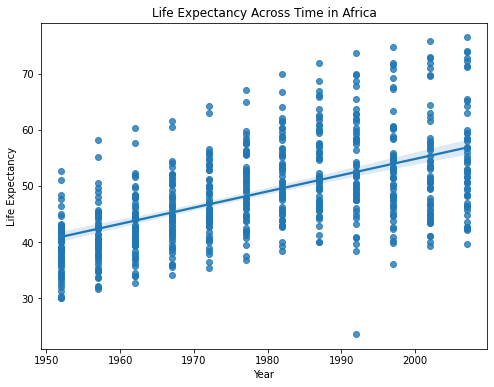

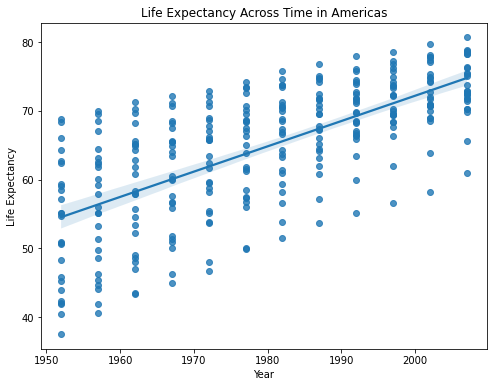

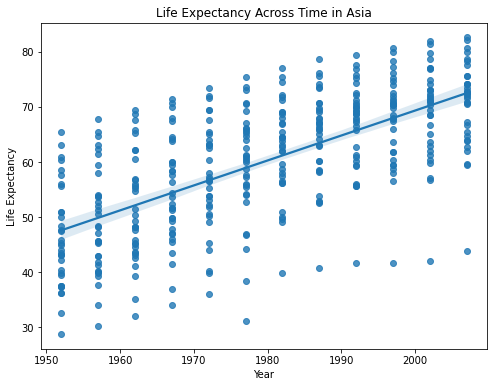

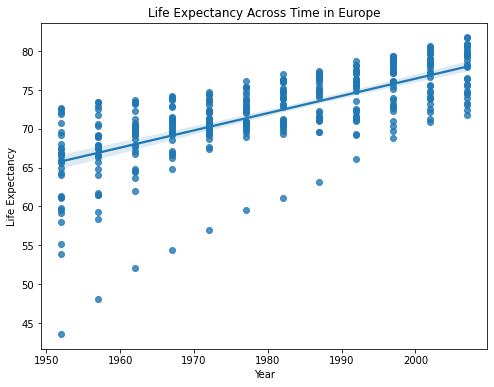

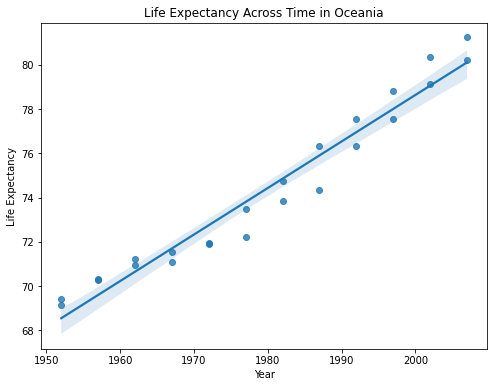

In [26]:
continents = np.unique(data['continent'])

for c in continents:
    temp = data.drop(data[c != data['continent']].index)
    plt.figure(figsize = (8, 6))
    sns.regplot(x = 'year', y = 'lifeExp', data = temp)
    
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.title("Life Expectancy Across Time in " + c)

### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, this regression model should include an interaction term for continent and year. The plots above demonstrate that the plotted data is significantly different for each continent, alluding to the fact that the continent itself has a semi-significant effect on the overall life expectancy across time.

## Exercise 6

### Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [28]:
lin_reg2 = ols(formula = "lifeExp ~ year * continent", data = data).fit()
print(lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:40:57   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The regression summary table above demonstrates the results of the regression model for life expectancy and the interaction between continent and year. Displayed under the "coef" column, are the coefficients for each continent individually, and the interaction between the year and each continent. The unlabeled "Intercept" and "year" value correspond to the continent of Africa, which in this case is used for the default interaction (only becasue it comes alphabetically first). As you can see, each coefficient and intercept are different from the corresponding values we got from the previous regression model earlier in the project.

### Question 11: Are all parameters in the model significantly (in the p-value sense) different from zero? If not, which are not significantly different from zero?

In [29]:
lin_reg2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

All of the parameters are significantly different in the linear regression model are significantly different from zero. However, something to note is thst all parameters have a p-value that is less than or equal to 0.05, except for the continent of Oceania. Without the interaction term, its p-value is 0.287, and with the interaction term, it is 0.360.

### Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer the question by extracting relevant estimates from model fit)

In [35]:
lin_reg2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Using the interaction coefficients from the bottom half of the table, we can see that the life expectancy in Africa increases by aproxximately 0.290 years on average, approximately 0.078 in the Americas, and approximately 0.164 in Asia. The life expectancy actually decreases on average in Europe by approximately 0.068 years, and in Oceania by approximately 0.079 years. 

## Exercise 7

### Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

In [46]:
inter_data = data[['continent', 'year', 'lifeExp']]
inter_data = inter_data.sort_values(by='continent').reset_index(drop=True)

intcpts = []
coefs = []

# adding each intercept and coefficient value to correspinding lists
for value in lin_reg2.params:
    if (value > 1) or (value < -1):
        intcpts.append(value)
    else:
        coefs.append(value)

exp_arr = []

# calculating expected value based on continent interaction
for i, row in inter_data.iterrows():
    if row['continent'] == 'Africa':
        exp = coefs[0] * (row['year']) + intcpts[0]
    elif row['continent'] == 'Americas':
        exp = coefs[1] * (row['year']) + intcpts[1]
    elif row['continent'] == 'Asia':
        exp = coefs[2] * (row['year']) + intcpts[2]
    elif row['continent'] == 'Europe':
        exp = coefs[3] * (row['year']) + intcpts[3]
    elif row['continent'] == 'Oceania':
        exp = coefs[4] * (row['year']) + intcpts[4]
    
    exp_arr.append(exp)

# calculating residuals based on continent interaction
inter_data['expected_lifeExp'] = exp_arr
inter_data['residuals'] = inter_data['lifeExp'] - inter_data['expected_lifeExp']

Text(0.5, 1.0, 'Life Expectancy Residuals Across Time (Using Interaction Model)')

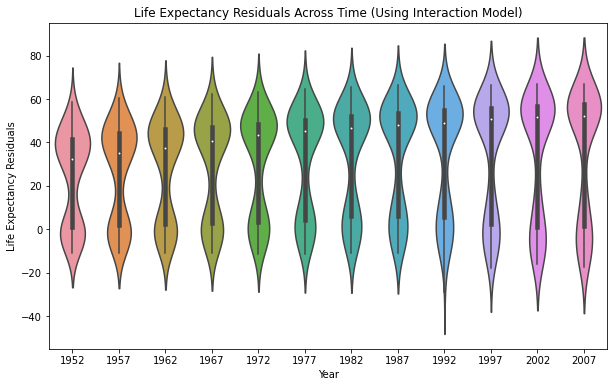

In [47]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'year', y = 'residuals', data = inter_data)

plt.xlabel("Year")
plt.ylabel("Life Expectancy Residuals")
plt.title("Life Expectancy Residuals Across Time (Using Interaction Model)")

# Part 2: Classification

In [111]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np

In [112]:
# laoding dataset
wine = load_wine(as_frame=True)

wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [124]:
# splitting data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 42)

clf_model = DecisionTreeClassifier(random_state = 42)

# using cross-val to calculate training accuracy
scores = cross_val_score(clf_model, x_train, y_train, cv = 10)
print("Training Accuracy: " + scores.mean().astype('str'))

# fitting model and calculating testing accuracy
clf_model.fit(x_train, y_train)
print("Testing Accuracy: " + clf_model.score(x_test, y_test).astype('str'))

Training Accuracy: 0.8928571428571429
Testing Accuracy: 0.9444444444444444


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

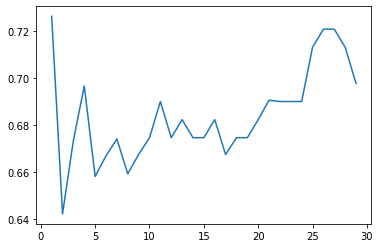

In [137]:
# splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify = wine.target, random_state = 42)

kf = KFold(n_splits = 10)

test_acc = []
knn_range = range(1, 30)

# using 10-fold cross-val to find optimal k-value
for n in knn_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    kf_train_acc = []
    for train, test in kf.split(x_train):
        knn.fit(x_train.iloc[train], y_train.iloc[train])
        kf_train_acc.append(knn.score(x_train.iloc[test], y_train.iloc[test]))
    test_acc.append(np.mean(kf_train_acc))
    
# plotting range to find optimal k-value
plt.plot(knn_range, test_acc)

In [138]:
# using cross-val with optimal k-value to calculate training accuracy
best_knn = KNeighborsClassifier(n_neighbors = 27)
scores = cross_val_score(best_knn, x_train, y_train, cv = 10)

print("Training Accuracy: " + scores.mean().astype('str'))

# calculating testing accuracy
best_knn.fit(x_train, y_train)
print("Testing Accuracy: " + best_knn.score(x_test, y_test).astype('str'))

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

Training Accuracy: 0.7357142857142857
Testing Accuracy: 0.7777777777777778


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The dataset I chose to use is the SciKitLearn-given wine dataset, which itself is a copy of the UCI Machine Learning Wine Data Set. The data are the results of chemical analyses on different wines grown in the same region in Italy, but derived from three different cultivars. There are 13 determined constituents found in each of the three types of wine, including the alcohol level, the total phenols, the color intensity, and the hue of the wine. Each atrrbute is represented by either an integer or a real number. There are a total of 178 different wines included in this dataset.

Based on each attribute given in the dataset, I aim to predict which of the 178 different wines was cultivated by each of the three cultivars. Based on specific attribute trends, we are able to classify each wine into one of three classes (each class corresponding to a different cultivar).

The two algorithms that I chose to use to classify the data were the Decision Tree Classifier algorithm and the K-Nearest Neighbors algorithm. For the decision tree algorithm, I did not specify any hyper-parameters apart from a specific random state in order to be able to observe a deterministic behaviour durring fitting. After doing a 10-fold cross-validating procedure, the accuracy for this algorithm was calculated as 94.444%. For the K-Nearest Neighbors algorithm, I used 10-fold cross-validation to find which k-value would be the most accurate in a range of k=1 to k=30. I found that k=27 was the most accurate, and then used that value to calculate the accuracy for this algorithm, which was 77.777%.